In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats


file_path = 'CFD.xlsx'

df = pd.read_excel(file_path)

In [2]:
df['rotating'] = df['rotating'].replace({'co': 0, 'counter': 1})

In [3]:
features = df.drop('rotating', axis=1)
target = df['rotating']
stats.spearmanr(features.nc,features.torque)

SignificanceResult(statistic=0.6883388124811698, pvalue=4.7583241394898816e-70)

In [4]:
sc = MinMaxScaler()
X = features
y = target
X_scale = sc.fit_transform(X)
X_scale

array([[0.        , 0.        , 0.        , 0.13723221],
       [0.        , 0.        , 0.11111111, 0.19524009],
       [0.        , 0.        , 0.22222222, 0.25553015],
       ...,
       [1.        , 1.        , 1.        , 0.96159906],
       [0.75      , 1.        , 0.33333333, 0.61981282],
       [0.75      , 1.        , 0.33333333, 0.61946015]])

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [6]:

 X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size = 0.30, random_state = 42,stratify=target)



In [7]:
from sklearn.model_selection import cross_val_score
cv_values = np.arange(2,3)
cv_values

array([2])

In [8]:
#knn = KNeighborsClassifier(n_neighbors=5)
#knn.fit(X_train, y_train)
for cv in cv_values:
    knn = KNeighborsClassifier()
    param_grid = {'n_neighbors': np.arange(1, 20)}
    knn_gscv = GridSearchCV(knn, param_grid, cv=cv, scoring='accuracy')
    knn_gscv.fit(X_scale,y)
    score = knn_gscv.best_params_ , knn_gscv.best_score_
    print (score)
score[0]

({'n_neighbors': 6}, 0.4857142857142857)


{'n_neighbors': 6}

In [9]:
y_pred = knn_gscv.predict(X_test)
#np.mean(X[:, 1])
y_pred.shape
y_test.shape


(147,)

In [10]:
X_train2 = X_train[:,[2,3]]
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train2, y_train)


KNeighborsClassifier()

In [11]:
X_test2 = X_test[:,[2,3]]
y_pred = knn2.predict(X_test2)
y_pred


array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [12]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix (y_test,y_pred)
CM

array([[72,  0],
       [ 0, 75]])

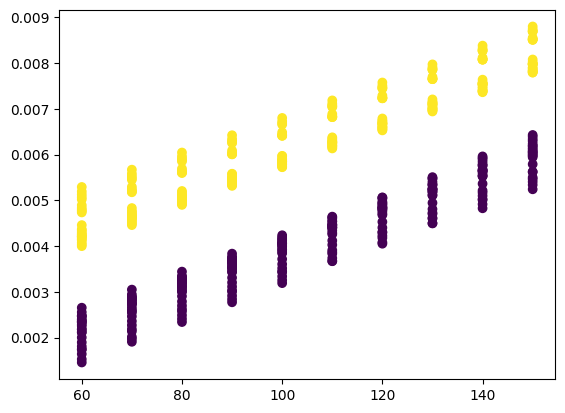

In [13]:
plt.scatter(features.nc,features.torque,c=target)

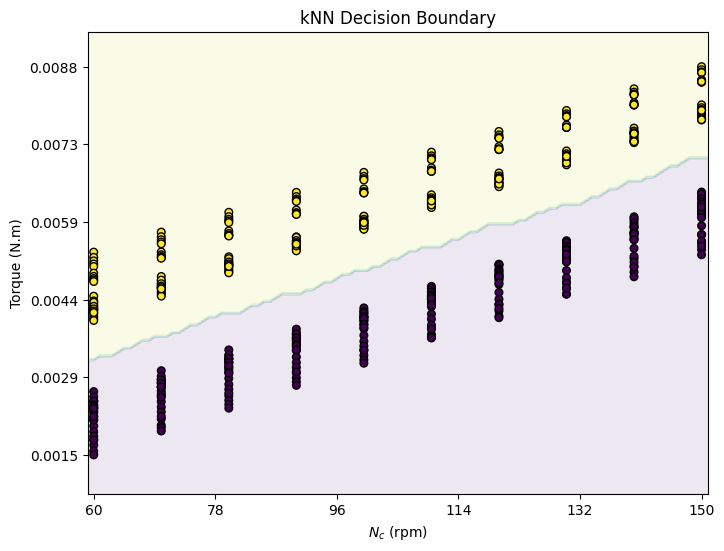

In [14]:
x_min, x_max = X_scale[:, 2].min() - 0.1, X_scale[:, 2].max() + 0.1
y_min, y_max = X_scale[:, 3].min() - 0.1, X_scale[:, 3].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = knn2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.1)
# Plot the training points
scatter = plt.scatter(X_scale[:, 2], X_scale[:, 3], c=target, s=30, edgecolor='k')

#legend1 = plt.legend( *scatter.legend_elements())
#plt.gca().add_artist(legend1)
plt.xlim(-0.01, 1.01)
val = np.linspace(X.values[:, 3].min(),X.values[:, 3].max(), num = 6)
val_r = np.round(val, 4)

plt.xticks([0.0, 0.2, 0.4 ,0.6, 0.8 ,1.0], [60, 78 ,96, 114 ,132, 150])
plt.yticks([0.0, 0.2, 0.4 ,0.6, 0.8 ,1.0], val_r)
plt.title('kNN Decision Boundary')
plt.xlabel('$N_{c}$ (rpm)')
plt.ylabel('Torque (N.m)')
plt.show()


In [15]:
from sklearn.svm import SVC

svm = SVC(C = 100.0, kernel='linear')
svm.fit(X_train2, y_train)
y_pred= svm.predict(X_test2)

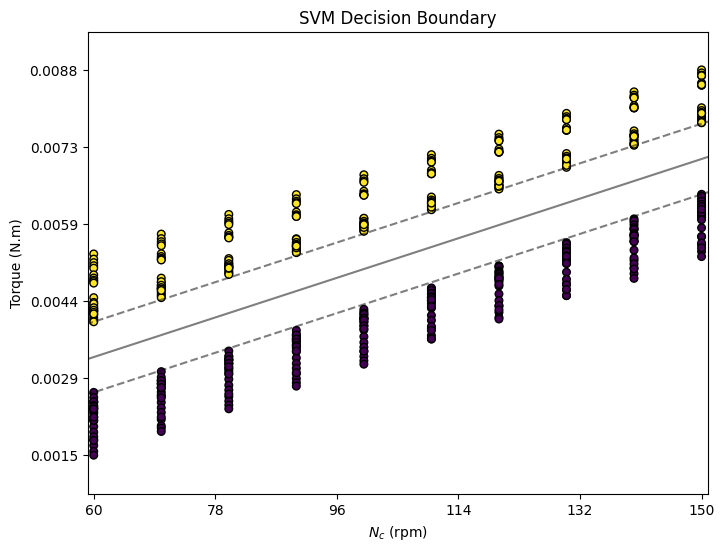

In [16]:
# Plotting decision boundary, margin lines, and support vectors for SVM

# Create a mesh to plot in
x_min, x_max = X_scale[:, 2].min() - 0.1, X_scale[:, 2].max() + 0.1
y_min, y_max = X_scale[:, 3].min() - 0.1, X_scale[:, 3].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.001),
                     np.arange(y_min, y_max, 0.001))

# Plot the decision boundary and margins
plt.figure(figsize=(8, 6))
Z_svm = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_svm = Z_svm.reshape(xx.shape)
plt.contour(xx, yy, Z_svm, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Plot the training points
scatter = plt.scatter(X_scale[:, 2], X_scale[:, 3], c=target, s=30, edgecolor='k')

#legend1 = plt.legend( *scatter.legend_elements())
#plt.gca().add_artist(legend1)
plt.xlim(-0.01, 1.01)
val = np.linspace(X.values[:, 3].min(),X.values[:, 3].max(), num = 6)
val_r = np.round(val, 4)

plt.xticks([0.0, 0.2, 0.4 ,0.6, 0.8 ,1.0], [60, 78 ,96, 114 ,132, 150])
plt.yticks([0.0, 0.2, 0.4 ,0.6, 0.8 ,1.0], val_r)
plt.title('SVM Decision Boundary')
plt.xlabel('$N_{c}$ (rpm)')
plt.ylabel('Torque (N.m)')
plt.savefig('SVM Decision Boundary', dpi=300)
#plt.show()
